## Astrohysical Techniques

Shoaib Shamsi

### Deriving the airmass formula for plane-parallel atmosphere from the Beer-Lambert Law.

We know that the Beer-Lambert law states that the observed apparent magnitude ($m_\lambda^A$) depends linearly on the airmass ($X$).

$m_\lambda^A = m_\lambda + k_\lambda X$

In the case of a plane-parallel atmosphere, when the angle from the zenith to the object $Z$ is $0$, we say that $X=1$. From this, it is easy to draw a right angle triangle which has sides of airmass $1$ and $X$ on either side of the angle $Z$. this means that the airmass is:

$X = \sec{Z}$

In [1]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u
from astropy.time import Time
from scipy.optimize import curve_fit

In [2]:
### Let's write down our data

stars = ['HR7235', 'HR7235', 'HR7235', 'HR7235', 
         'HR7298', 'HR7298', 'HR7298', 'HR7298', 
         'HR7377', 'HR7377', 'HR7377', 'HR7377', 
         'HR7387', 'HR7387', 'HR7387', 'HR7387',
         'HR7405', 'HR7405', 'HR7405', 'HR7405', 
         'HR7478', 'HR7478', 'HR7478', 'HR7478']
N_Vs = [1.49e7, 1.42e7, 1.32e7, 1.05e7,
        4.65e6, 4.33e6, 3.21e6, 3.61e6,
        1.04e7, 9.60e6, 8.33e6, 6.91e6,
        3.24e6, 2.82e6, 2.38e6, 1.91e6,
        3.92e6, 3.81e6, 3.45e6, 2.56e6,
        3.12e6, 3.12e6, 2.96e6, 2.38e6]
N_Bs = [4.90e7, 4.37e7, 4.03e7, 2.74e7,
        1.94e7, 1.79e7, 1.11e7, 1.24e7,
        2.82e7, 2.40e7, 1.97e7, 1.45e7,
        7.42e6, 5.67e6, 4.53e6, 3.01e6,
        4.37e6, 4.17e6, 3.58e6, 2.23e6,
        5.47e6, 5.52e6, 4.96e6, 3.42e6]
LSTs = ['19 29.6', '22 18.6', '23 10.2', '00 09.4',
        '19 32.8', '22 22.0', '23 13.6', '01 15.2',
        '19 36.0', '22 25.6', '23 17.1', '00 02.1',
        '19 39.5', '22 29.1', '23 21.0', '00 05.9',
        '19 43.1', '22 32.8', '23 24.4', '01 19.0',
        '19 46.9', '22 36.7', '23 28.7', '01 23.1']

df = pd.DataFrame({'star': stars, 'N_V': N_Vs, 'N_B': N_Bs, 'LST': LSTs})
df.head()

,star,N_V,N_B,LST
0,HR7235,14900000.0,49000000.0,19 29.6
1,HR7235,14200000.0,43700000.0,22 18.6
2,HR7235,13200000.0,40300000.0,23 10.2
3,HR7235,10500000.0,27400000.0,00 09.4
4,HR7298,4650000.0,19400000.0,19 32.8


We'll find the RA, DEC, B magnitude, and V magnitude for each star.

In [3]:
simbad = Simbad() # We'll use astroquery to get information from Simbad
simbad.add_votable_fields("flux(B)", 'flux(V)') #Adding the magnitude VO Tables

In [4]:
simbad_tables = [simbad.query_object(star) for star in df['star']]

In [5]:
RAs, DECs, Vs, Bs = [], [], [], []
for star_table in simbad_tables:
    RA_HA = star_table['RA'].value[0]
    DEC_DMS = star_table['DEC'].value[0]
    V = star_table['FLUX_V'].value[0]
    B = star_table['FLUX_B'].value[0]
    
    RAs.append(RA_HA)
    DECs.append(DEC_DMS)
    Vs.append(V)
    Bs.append(B)
    
df['RA_HS'] = RAs
df['DEC_DMS'] = DECs
df['V'] = Vs
df['B'] = Bs
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243


Let's find out the Zenith distances

In [6]:
# Converting the RA and DECs to degrees

RAs_deg, DECs_deg = [], []

for index, row in df.iterrows():
    ra_HS = row['RA_HS']
    dec_DMS = row['DEC_DMS']
    coord = SkyCoord(ra_HS, dec_DMS, unit=(u.hourangle, u.deg)) # For lazy conversion to degrees 
    ra_deg = coord.ra.deg
    dec_deg = coord.dec.deg
    RAs_deg.append(ra_deg)
    DECs_deg.append(dec_deg)

df['RA_deg'] = RAs_deg
df['DEC_deg'] = DECs_deg
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B,RA_deg,DEC_deg
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243,288.439535,39.145966


In [7]:
observatory_lat_deg = 43 + (52/60)
observatory_lat_rad = np.radians(observatory_lat_deg) # The Toronto observatory latitude

def calculate_cos_Z(LST_HA, RA_deg, DEC_deg):
    hh, mm = map(float, LST_HA.split())
    LST_hours = hh + (mm/60)
    LST_deg = LST_hours * 15
    
    hour_angle_deg = LST_deg - RA_deg
    hour_angle_rad = np.radians(hour_angle_deg)
    
    RA_rad = np.radians(RA_deg)
    DEC_rad = np.radians(DEC_deg)

    cos_Z = np.sin(observatory_lat_rad) * np.sin(DEC_rad) + np.cos(observatory_lat_rad) * np.cos(DEC_rad) * np.cos(hour_angle_rad)

    return cos_Z

cos_Zs = []
for index, row in df.iterrows():
    cos_Z = calculate_cos_Z(row['LST'], row['RA_deg'], row['DEC_deg'])
    cos_Zs.append(cos_Z)

df['cos_Z'] = cos_Zs
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B,RA_deg,DEC_deg,cos_Z
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.862102
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.631698
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.503277
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.335409
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243,288.439535,39.145966,0.994679


Calculate airmass

In [8]:
#Using the cos(Z) calculation to figure out airmass

def cosZ_to_airmass(cos_Z):
    if cos_Z > 0:
        airmass = (1/cos_Z) * (1 - 0.0012 * ((1/cos_Z**2) - 1))
    else:
        airmass = np.inf
    return airmass

df['X'] = df['cos_Z'].apply(cosZ_to_airmass)
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B,RA_deg,DEC_deg,cos_Z,X
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.862102,1.159474
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.631698,1.580175
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.503277,1.979949
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.335409,2.953211
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243,288.439535,39.145966,0.994679,1.005337


Let's now find $\beta$, $\gamma$, $\eta$, and $\epsilon$

In [9]:
# Calculating instrument magnitudes

def return_instrument_mag(N_photons):
    return -2.5 * np.log10(N_photons)

df['V_ins'] = df['N_V'].apply(return_instrument_mag)
df['B_ins'] = df['N_B'].apply(return_instrument_mag)
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B,RA_deg,DEC_deg,cos_Z,X,V_ins,B_ins
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.862102,1.159474,-17.932966,-19.225490
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.631698,1.580175,-17.880721,-19.101204
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.503277,1.979949,-17.801435,-19.013263
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.335409,2.953211,-17.552973,-18.594376
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243,288.439535,39.145966,0.994679,1.005337,-16.668632,-18.219504


In [10]:
# Fitting for gamma and beta with Scipy curve_fit

df['V-V_ins'] = df['V'] - df['V_ins']
df['B_ins-V_ins'] = df['B_ins'] - df['V_ins']

def linear_fit(x, m, c):
    return m * x + c

params, _ = curve_fit(linear_fit, df['B_ins-V_ins'].to_numpy(), df['V-V_ins'].to_numpy())
gamma, beta = params[0], params[1]

print('Gamma:\t', gamma)
print('Beta:\t', beta)

Gamma:	 -0.11787693721908243
Beta:	 20.68703430316984


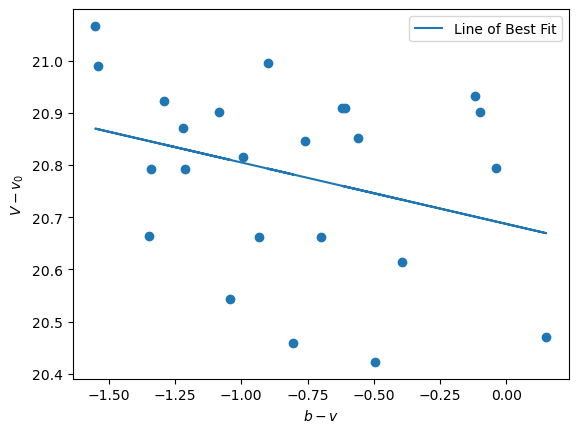

In [11]:
plt.scatter(df['B_ins-V_ins'].to_numpy(), df['V-V_ins'].to_numpy())
plt.plot(df['B_ins-V_ins'].to_numpy(), df['B_ins-V_ins'].to_numpy() * gamma + beta, label='Line of Best Fit')

plt.xlabel('$b-v$')
plt.ylabel('$V-v_0$')
plt.legend()

In [12]:
# Doing the same for eta and epsilon

df['B-V'] = df['B'] - df['V']

def linear_fit(x, m, c):
    return m * x + c

params, _ = curve_fit(linear_fit, df['B_ins-V_ins'].to_numpy(), df['B-V'].to_numpy())
epsilon, eta = params[0], params[1]

print('Epsilon:\t', epsilon)
print('Eta:\t\t', eta)

Epsilon:	 1.1602652408347853
Eta:		 1.4818180804431966


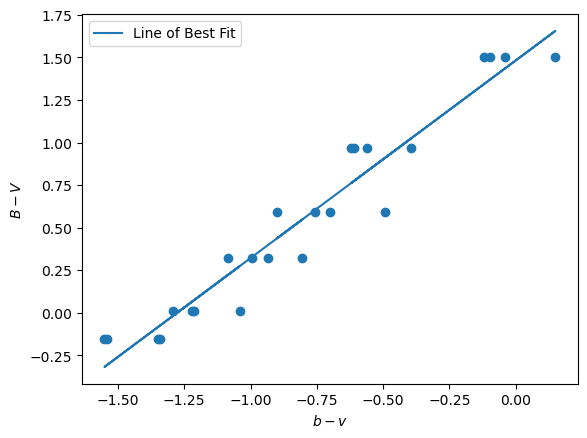

In [13]:
plt.scatter(df['B_ins-V_ins'].to_numpy(), df['B-V'].to_numpy())
plt.plot(df['B_ins-V_ins'].to_numpy(), df['B_ins-V_ins'].to_numpy() * epsilon + eta, label='Line of Best Fit')

plt.xlabel('$b-v$')
plt.ylabel('$B-V$')
plt.legend()

### How we will find out the apparent magnitudes for our reference star observations

In [14]:
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B,RA_deg,DEC_deg,cos_Z,X,V_ins,B_ins,V-V_ins,B_ins-V_ins,B-V
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.862102,1.159474,-17.932966,-19.225490,20.922966,-1.292525,0.010
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.631698,1.580175,-17.880721,-19.101204,20.870721,-1.220483,0.010
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.503277,1.979949,-17.801435,-19.013263,20.791435,-1.211828,0.010
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.335409,2.953211,-17.552973,-18.594376,20.542973,-1.041403,0.010
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243,288.439535,39.145966,0.994679,1.005337,-16.668632,-18.219504,21.066632,-1.550872,-0.155


In [15]:
# Populating observed reference star magnitudes using the instrumental magnitudes

def return_V_obs(Bins_minus_Vins, V_ins):
    return beta + gamma * Bins_minus_Vins + V_ins

df['V_obs'] = df.apply(lambda row: return_V_obs(row['B_ins-V_ins'], row['V_ins']), axis=1)
df.head()

,star,N_V,N_B,LST,RA_HS,DEC_DMS,V,B,RA_deg,DEC_deg,cos_Z,X,V_ins,B_ins,V-V_ins,B_ins-V_ins,B-V,V_obs
0,HR7235,14900000.0,49000000.0,19 29.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.862102,1.159474,-17.932966,-19.225490,20.922966,-1.292525,0.010,2.906427
1,HR7235,14200000.0,43700000.0,22 18.6,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.631698,1.580175,-17.880721,-19.101204,20.870721,-1.220483,0.010,2.950180
2,HR7235,13200000.0,40300000.0,23 10.2,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.503277,1.979949,-17.801435,-19.013263,20.791435,-1.211828,0.010,3.028446
3,HR7235,10500000.0,27400000.0,00 09.4,19 05 24.6080,+13 51 48.518,2.990,3.000,286.352533,13.863477,0.335409,2.953211,-17.552973,-18.594376,20.542973,-1.041403,0.010,3.256818
4,HR7298,4650000.0,19400000.0,19 32.8,19 13 45.4884,+39 08 45.477,4.398,4.243,288.439535,39.145966,0.994679,1.005337,-16.668632,-18.219504,21.066632,-1.550872,-0.155,4.201214


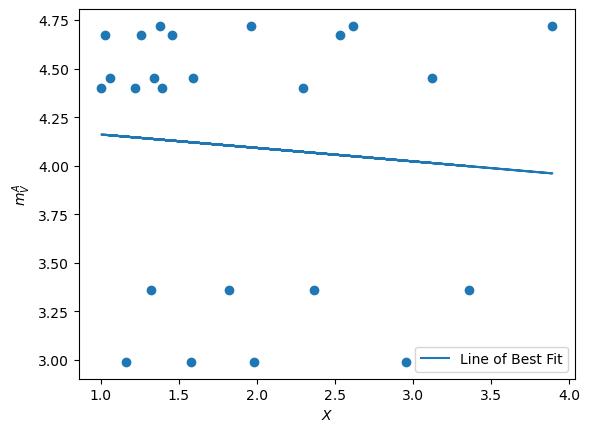

In [16]:
# Fitting to find k_V

params, _ = curve_fit(linear_fit, df['X'].to_numpy(), df['V'].to_numpy())
k_V, m = params[0], params[1]

plt.scatter(df['X'].to_numpy(), df['V'].to_numpy())
plt.plot(df['X'].to_numpy(), df['X'].to_numpy() * k_V + m, label='Line of Best Fit')

plt.xlabel('$X$')
plt.ylabel('$m_V^A$')
plt.legend()

### Applying the results to our star

The first orger colour correction index is just $\eta$.

In [17]:
target_V_estimate = gamma * (return_instrument_mag(7.7E5) - return_instrument_mag(3.56E5)) + beta + return_instrument_mag(3.56E5)

print('The estimated true V magnitude of our star is {:.3f}'.format(target_V_estimate))

The estimated true V magnitude of our star is 6.907


In [18]:
# Let's check the target star around its coordinates.

target_table = simbad.query_region(SkyCoord(ra='19h34.1m', dec='+31d18m'), radius=100 * u.arcsec)
target_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_B,FLUX_V,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,int32
Gaia DR3 2044818055433168768,19 34 05.2157,+31 18 17.341,14,14,0.079,0.091,90,A,O,2020yCat.1350....0G,--,--,1


The target star does not have UBV mags, but does have Gaia magnitudes. The G-band Gaia magnitude is around 18, which is very far away.